# Debugging Python Errors

This notebook covers common errors in Python, with special focus on some of the scientific computing libraries (NumPy, Pandas, Matplotlib). You'll learn how to read error messages and fix common problems.

## 1. How to Read Python Error Messages

### Anatomy of a Traceback

When Python encounters an error, it produces a **traceback** - a detailed report showing:
1. **Where** the error occurred (file and line number)
2. **What** code was executing
3. **Why** it failed (error type and message)

**Example traceback:**
```
Traceback (most recent call last):           # Starting point of the error
  File "script.py", line 10, in <module>     # File and line number
    result = divide_numbers(10, 0)           # The code that was running
  File "script.py", line 5, in divide_numbers
    return a / b                              # Where the error actually happened
ZeroDivisionError: division by zero          # Error type and message
```

**How to read it:**
- Start at the **bottom** - this tells you what went wrong
- Work your way **up** to see the chain of function calls
- The **last line** shows the error type and description
- The lines above show the **call stack** - which functions called which

In [1]:
# Let's trigger an error and examine the traceback
def calculate_average(numbers):
    total = sum(numbers)
    count = len(numbers)
    return total / count

def process_data(data):
    return calculate_average(data)

# This will produce an error - run it and examine the traceback
result = process_data([])

ZeroDivisionError: division by zero

**Reading the traceback above:**
1. Bottom line: `ZeroDivisionError: division by zero` - tells us what went wrong
2. The line above shows `return total / count` - the exact line that failed
3. The call stack shows: `process_data()` called `calculate_average()`
4. The root cause: we passed an empty list, so `len(numbers)` returned 0

## 2. Common General Python Errors

### 2.1 SyntaxError

**What it means:** Python can't understand your code because of invalid syntax.

**Common causes:** Missing colons, unmatched parentheses, incorrect indentation

In [2]:
# ERROR: Missing colon after if statement
x = 5
if x > 3
    print("x is greater than 3")

SyntaxError: expected ':' (3344137001.py, line 3)

In [3]:
# FIXED:
x = 5
if x > 3:  # Added colon
    print("x is greater than 3")

x is greater than 3


In [ ]:
# ERROR: Unmatched parentheses
result = (5 + 3) * (2 + 4
print(result)

SyntaxError: '(' was never closed (4194639336.py, line 2)

In [5]:
# FIXED:
result = (5 + 3) * (2 + 4)  # Added closing parenthesis
print(result)

48


### 2.2 IndentationError

**What it means:** Inconsistent or incorrect indentation.

**Common causes:** Mixing tabs and spaces, wrong indentation level

In [ ]:
# ERROR: Inconsistent indentation
def calculate_sum(a, b):
    result = a + b
     return result  # Too much indentation

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)

In [7]:
# FIXED:
def calculate_sum(a, b):
    result = a + b
    return result  # Correct indentation (4 spaces)

### 2.3 NameError

**What it means:** Python can't find a variable or function name.

**Common causes:** Typos, using a variable before defining it, scope issues

In [8]:
# ERROR: Variable not defined
print(temperature)  # temperature doesn't exist yet

NameError: name 'temperature' is not defined

In [9]:
# FIXED:
temperature = 72
print(temperature)

72


In [10]:
# ERROR: Typo in variable name
data_values = [1, 2, 3, 4, 5]
print(data_value)  # Missing 's' at the end

NameError: name 'data_value' is not defined

In [11]:
# FIXED:
data_values = [1, 2, 3, 4, 5]
print(data_values)  # Correct spelling

[1, 2, 3, 4, 5]


### 2.4 TypeError

**What it means:** An operation is applied to an object of inappropriate type.

**Common causes:** Wrong number of arguments, incompatible types in operations

In [12]:
# ERROR: Can't add string and integer
age = 25
message = "Age is " + age

TypeError: can only concatenate str (not "int") to str

In [13]:
# FIXED: Convert to string or use f-string
age = 25
message = "Age is " + str(age)
# Or better:
message = f"Age is {age}"
print(message)

Age is 25


In [14]:
# ERROR: Wrong number of arguments
def greet(name, greeting):
    return f"{greeting}, {name}!"

message = greet("Alice")  # Missing 'greeting' argument

TypeError: greet() missing 1 required positional argument: 'greeting'

In [15]:
# FIXED:
def greet(name, greeting):
    return f"{greeting}, {name}!"

message = greet("Alice", "Hello")  # Provide both arguments
print(message)

Hello, Alice!


### 2.5 IndexError

**What it means:** Trying to access an index that doesn't exist in a sequence.

**Common causes:** Off-by-one errors, accessing empty lists

In [16]:
# ERROR: Index out of range
data = [10, 20, 30]
print(data[3])  # Only indices 0, 1, 2 exist

IndexError: list index out of range

In [17]:
# FIXED: Check length or use try-except
data = [10, 20, 30]
if len(data) > 3:
    print(data[3])
else:
    print("Index 3 doesn't exist")
    print(f"Last element is at index {len(data)-1}")

Index 3 doesn't exist
Last element is at index 2


### 2.6 KeyError

**What it means:** Trying to access a dictionary key that doesn't exist.

**Common causes:** Typos in key names, assuming keys exist

In [18]:
# ERROR: Key doesn't exist
person = {'name': 'Alice', 'age': 30}
print(person['email'])  # No 'email' key

KeyError: 'email'

In [19]:
# FIXED: Use .get() method or check if key exists
person = {'name': 'Alice', 'age': 30}

# Method 1: Use .get() with default value
email = person.get('email', 'No email provided')
print(email)

# Method 2: Check if key exists
if 'email' in person:
    print(person['email'])
else:
    print('Email not found')

No email provided
Email not found


## 3. NumPy-Specific Errors

In [5]:
import numpy as np

### 3.1 Shape Mismatch Errors

**What it means:** Arrays have incompatible shapes for the operation.

**Common causes:** Broadcasting issues, matrix multiplication with wrong dimensions

In [6]:
# ERROR: Shapes don't align for matrix multiplication
a = np.array([[1, 2, 3],
              [4, 5, 6]])  # Shape: (2, 3)

b = np.array([[7, 8],
              [9, 10]])     # Shape: (2, 2)

# This will fail - inner dimensions don't match (3 != 2)
result = np.dot(a, b)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [8]:
# FIXED: Ensure shapes are compatible
a = np.array([[1, 2, 3],
              [4, 5, 6]])  # Shape: (2, 3)

b = np.array([[7, 8],
              [9, 10],
              [11, 12]])    # Shape: (3, 2) - now compatible!

result = np.dot(a, b)  # Result shape: (2, 2)
print("Result shape:", result.shape)
print(result)

Result shape: (2, 2)
[[ 58  64]
 [139 154]]


**Debugging tip:** Always check array shapes before operations:

In [9]:
# Good practice: Print shapes when debugging
a = np.random.rand(5, 3)
b = np.random.rand(3, 4)

print(f"a.shape: {a.shape}")
print(f"b.shape: {b.shape}")
print(f"For dot product: a's columns ({a.shape[1]}) must equal b's rows ({b.shape[0]})")

result = np.dot(a, b)
print(f"result.shape: {result.shape}")

a.shape: (5, 3)
b.shape: (3, 4)
For dot product: a's columns (3) must equal b's rows (3)
result.shape: (5, 4)


### 3.2 Broadcasting Errors

**What it means:** Arrays can't be broadcast to a compatible shape.

In [10]:
# ERROR: Incompatible shapes for broadcasting
a = np.array([[1, 2, 3],
              [4, 5, 6]])  # Shape: (2, 3)

b = np.array([1, 2])       # Shape: (2,)

# This fails because shapes don't align: (2,3) + (2,)
result = a + b

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

In [25]:
# FIXED: Reshape b to be compatible
a = np.array([[1, 2, 3],
              [4, 5, 6]])  # Shape: (2, 3)

b = np.array([1, 2])       # Shape: (2,)
b_reshaped = b.reshape(2, 1)  # Shape: (2, 1)

result = a + b_reshaped    # Broadcasting works: (2,3) + (2,1) = (2,3)
print(result)

[[2 3 4]
 [6 7 8]]


### 3.3 IndexError with NumPy Arrays

**What it means:** Index is out of bounds or wrong number of indices.

In [26]:
# ERROR: Too many indices for array dimensions
arr = np.array([1, 2, 3, 4, 5])  # 1D array
value = arr[0, 1]  # Trying to use 2D indexing on 1D array

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [27]:
# FIXED: Use appropriate indexing for array dimensions
arr = np.array([1, 2, 3, 4, 5])  # 1D array
value = arr[0]  # Use single index for 1D array
print(value)

# For 2D arrays:
arr_2d = np.array([[1, 2, 3],
                   [4, 5, 6]])
value = arr_2d[0, 1]  # Now 2D indexing is correct
print(value)

1
2


### 3.4 ValueError: setting an array element with a sequence

**What it means:** Trying to create an array from irregular nested sequences.

In [28]:
# ERROR: Irregular shape (ragged array)
data = [[1, 2, 3],
        [4, 5],        # Different length!
        [6, 7, 8, 9]]  # Different length!

arr = np.array(data)  # Can't create regular array from irregular data

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [29]:
# FIXED: Either fix the data structure or use object dtype
# Option 1: Make data regular
data_regular = [[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]]
arr = np.array(data_regular)
print("Regular array:")
print(arr)

# Option 2: Use object dtype for irregular data (not recommended for numerical computation)
data_irregular = [[1, 2, 3],
                  [4, 5],
                  [6, 7, 8, 9]]
arr_obj = np.array(data_irregular, dtype=object)
print("\nIrregular array (object dtype):")
print(arr_obj)

Regular array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Irregular array (object dtype):
[list([1, 2, 3]) list([4, 5]) list([6, 7, 8, 9])]


## 4. Pandas-Specific Errors

In [12]:
import pandas as pd

### 4.1 KeyError: Column Not Found

**What it means:** Trying to access a column that doesn't exist in the DataFrame.

In [ ]:
# ERROR: Column name doesn't exist or has wrong case/spacing
df = pd.DataFrame({
    'Temperature': [72, 75, 68, 71],
    'Humidity': [45, 50, 55, 48]
})

# This will fail - wrong case
temps = df['temperature']

KeyError: 'Temperature'

In [32]:
# FIXED: Check column names and use correct spelling
df = pd.DataFrame({
    'Temperature': [72, 75, 68, 71],
    'Humidity': [45, 50, 55, 48]
})

# Check what columns exist
print("Available columns:", df.columns.tolist())

# Use correct column name
temps = df['Temperature']  # Correct case
print(temps)

Available columns: ['Temperature', 'Humidity']
0    72
1    75
2    68
3    71
Name: Temperature, dtype: int64


### 4.2 ValueError: Length Mismatch

**What it means:** Trying to assign a Series or list with different length than the DataFrame.

In [15]:
# ERROR: New column has wrong length
df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8]
})

# This fails - list has only 3 elements, DataFrame has 4 rows
df['C'] = [9, 10, 11]

ValueError: Length of values (3) does not match length of index (4)

In [34]:
# FIXED: Ensure new data matches DataFrame length
df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8]
})

print(f"DataFrame has {len(df)} rows")

# Provide correct number of values
df['C'] = [9, 10, 11, 12]  # 4 elements to match 4 rows
print(df)

DataFrame has 4 rows
   A  B   C
0  1  5   9
1  2  6  10
2  3  7  11
3  4  8  12


In [18]:
df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8]
})
df.index = ['w', 'x', 'y', 'z']

df2 = pd.DataFrame({'C': [10, 11, 12]})  # 4 elements to match 4 rows
df2.index = ['w', 'x', 'z']

df['C'] = df2['C']


In [23]:
df.isna().any()

A    False
B    False
C     True
dtype: bool

### 4.3 SettingWithCopyWarning

**What it means:** You might be modifying a copy of a DataFrame instead of the original.

**Why it matters:** Changes might not persist, leading to confusing bugs.

In [35]:
# PROBLEMATIC: Chained assignment (may not work as expected)
df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8]
})

# This can trigger a warning
df[df['A'] > 2]['B'] = 999

/var/folders/7c/k9ztpxkn35s1mbm2kjthjwz80000gn/T/ipykernel_25925/1666458898.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['A'] > 2]['B'] = 999


In [36]:
# FIXED: Use .loc[] for proper assignment
df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8]
})

# Correct way: use .loc[] with boolean indexing
df.loc[df['A'] > 2, 'B'] = 999
print(df)

   A    B
0  1    5
1  2    6
2  3  999
3  4  999


### 4.4 TypeError: Cannot Perform Operation on Mixed Types

**What it means:** Column contains mixed data types or unexpected types.

In [37]:
# ERROR: Mixed types in column
df = pd.DataFrame({
    'values': [1, 2, '3', 4, 5]  # Notice '3' is a string
})

# This will fail because of mixed types
total = df['values'].sum()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [38]:
# FIXED: Check and convert data types
df = pd.DataFrame({
    'values': [1, 2, '3', 4, 5]
})

# Check the data type
print("Original dtype:", df['values'].dtype)

# Convert to numeric, coercing errors to NaN
df['values'] = pd.to_numeric(df['values'], errors='coerce')
print("New dtype:", df['values'].dtype)

total = df['values'].sum()
print(f"Total: {total}")

Original dtype: object
New dtype: int64
Total: 15


### 4.5 AttributeError: DataFrame Has No Attribute

**What it means:** Using a method or attribute that doesn't exist.

In [39]:
# ERROR: Wrong method name
df = pd.DataFrame({
    'A': [1, 2, 3, 4]
})

# Method doesn't exist - should be mean() not average()
avg = df['A'].average()

AttributeError: 'Series' object has no attribute 'average'

In [40]:
# FIXED: Use correct method name
df = pd.DataFrame({
    'A': [1, 2, 3, 4]
})

avg = df['A'].mean()  # Correct method
print(f"Average: {avg}")

# Use dir() or help() to find available methods
# print([m for m in dir(df['A']) if not m.startswith('_')])

Average: 2.5


## 5. Matplotlib-Specific Errors

In [41]:
import matplotlib.pyplot as plt

### 5.1 ValueError: x and y must have same first dimension

**What it means:** Data arrays for plotting have different lengths.

ValueError: x and y must have same first dimension, but have shapes (5,) and (3,)

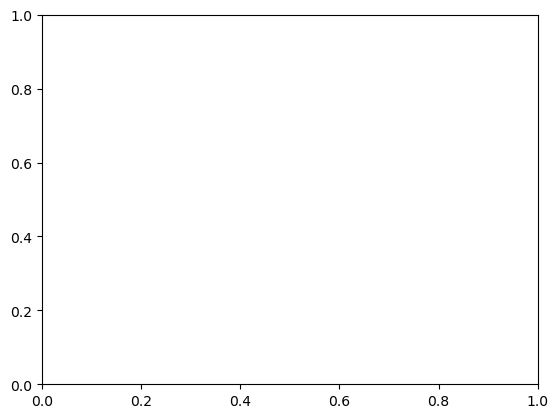

In [42]:
# ERROR: Mismatched array lengths
x = [1, 2, 3, 4, 5]
y = [10, 20, 30]  # Only 3 values!

plt.plot(x, y)
plt.show()

Length of x: 5, Length of y: 5


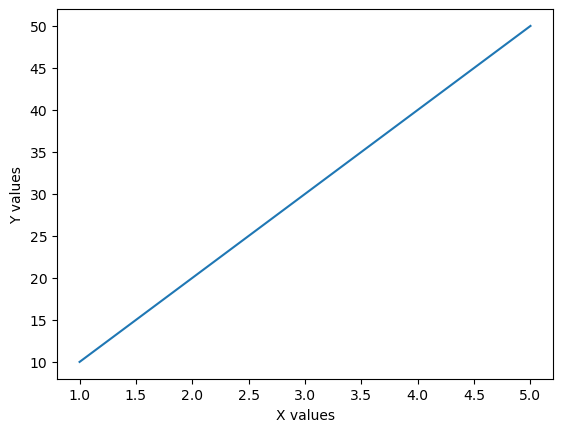

In [43]:
# FIXED: Ensure arrays have same length
x = [1, 2, 3, 4, 5]
y = [10, 20, 30, 40, 50]  # Now matches x

print(f"Length of x: {len(x)}, Length of y: {len(y)}")

plt.plot(x, y)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()

## 6. Debugging Strategies

### 6.1 Use Print Statements

The simplest debugging tool - inspect values at key points.

In [49]:
def process_data(data):
    print(f"DEBUG: Input data type: {type(data)}")
    print(f"DEBUG: Input data length: {len(data)}")
    print(f"DEBUG: First few elements: {data[:3]}")
    
    result = [x * 2 for x in data]
    
    print(f"DEBUG: Result length: {len(result)}")
    print(f"DEBUG: First few results: {result[:3]}")
    
    return result

data = [1, 2, 3, 4, 5]
output = process_data(data)

DEBUG: Input data type: <class 'list'>
DEBUG: Input data length: 5
DEBUG: First few elements: [1, 2, 3]
DEBUG: Result length: 5
DEBUG: First few results: [2, 4, 6]


### 6.2 Check Data Types and Shapes

Many errors stem from unexpected data types or shapes.

In [50]:
# Always check these when debugging
arr = np.array([[1, 2, 3], [4, 5, 6]])
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

print("NumPy array info:")
print(f"  Type: {type(arr)}")
print(f"  Shape: {arr.shape}")
print(f"  Dtype: {arr.dtype}")
print(f"  Size: {arr.size}")

print("\nDataFrame info:")
print(f"  Type: {type(df)}")
print(f"  Shape: {df.shape}")
print(f"  Columns: {df.columns.tolist()}")
print(f"  Dtypes:\n{df.dtypes}")

NumPy array info:
  Type: <class 'numpy.ndarray'>
  Shape: (2, 3)
  Dtype: int64
  Size: 6

DataFrame info:
  Type: <class 'pandas.core.frame.DataFrame'>
  Shape: (3, 2)
  Columns: ['A', 'B']
  Dtypes:
A    int64
B    int64
dtype: object


### 6.3 Use Try-Except Blocks

Catch errors gracefully and provide useful information.

In [51]:
def safe_divide(a, b):
    """Safely divide two numbers with error handling."""
    try:
        result = a / b
        return result
    except ZeroDivisionError:
        print(f"Error: Cannot divide {a} by zero")
        return None
    except TypeError as e:
        print(f"Error: Invalid types for division - {e}")
        return None

# Test different cases
print(safe_divide(10, 2))   # Normal case
print(safe_divide(10, 0))   # Division by zero
print(safe_divide(10, '2')) # Type error

5.0
Error: Cannot divide 10 by zero
None
Error: Invalid types for division - unsupported operand type(s) for /: 'int' and 'str'
None


### 6.5 Read Documentation

Use built-in help functions when you're unsure.

## 7. Quick Debugging Checklist

When you encounter an error:

1. **Read the error message carefully**
   - Start from the bottom of the traceback
   - Identify the error type and message
   - Find the exact line that failed

2. **Check your data**
   - Print variable values
   - Check types: `type(variable)`
   - Check shapes: `variable.shape` or `len(variable)`
   - Check dtypes: `variable.dtype` or `df.dtypes`

3. **Verify assumptions**
   - Does the file/column/key exist?
   - Are arrays the right shape?
   - Are data types compatible?
   - Are you using the right function/method?

4. **Simplify the problem**
   - Test with smaller data
   - Break complex operations into steps
   - Comment out code to isolate the issue

5. **Use debugging tools**
   - Print statements
   - Try-except blocks
   - Help documentation: `help(function)`

6. **Search for solutions**
   - Copy the error message and search online
   - Check official documentation
   - Look for similar issues on Stack Overflow

## 8. Common Error Patterns Summary

| Error Type | Common Cause | First Thing to Check |
|-----------|--------------|---------------------|
| SyntaxError | Missing colon, parenthesis | Line indicated in error |
| IndentationError | Wrong spacing | Indentation level |
| NameError | Typo or undefined variable | Variable spelling |
| TypeError | Wrong type or number of arguments | Variable types, function signature |
| IndexError | Index out of range | List/array length |
| KeyError | Missing key | Dictionary/DataFrame keys |
| ValueError (NumPy) | Shape mismatch | Array shapes with `.shape` |
| KeyError (Pandas) | Missing column | Column names with `.columns` |
| SettingWithCopyWarning | Chained assignment | Use `.loc[]` instead |
| ValueError (Matplotlib) | Length mismatch | Array lengths |

**Remember:** Most errors are simple typos or mismatches. Check the basics first!